<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [6]:
#блок загрузки библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                # чтобы посмотреть корреляцию данных
from sklearn.model_selection import train_test_split # функция разделения на обучающую и тестовую выборку
from sklearn.preprocessing import StandardScaler     # функция для стандартизации данных
from sklearn.tree import DecisionTreeClassifier      # классификатор дерева решений
from sklearn.metrics import f1_score                 # нахождение f1 меры
from sklearn.linear_model import LogisticRegression  # логистическая регрессия
from sklearn.ensemble import RandomForestClassifier  # классификатор случайного леса
from sklearn.utils import shuffle                    # используем в upsampling для перемешивания данных
from sklearn.metrics import roc_curve                # для построения графика ROC-кривой
from sklearn.metrics import roc_auc_score            #для вычисления ROC-кривой
pd.options.mode.chained_assignment = None            # чтобы не выподали предупреждения при стандартизации данных

In [2]:
#блок загрузки датасета
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
#изначально обрежем значения до 3 знака после запятой при воспроизведении
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#посмотрим на сами данные
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8.000,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7.000,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4.000,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4.000,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2.000,134603.880,1,1,1,71725.730,0


**1.1 Проведем подготовку данных**

In [56]:
#изучим сводную информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [57]:
#Изучим общие статистические данные данных
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,9091.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,4.998,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.895,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,2.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


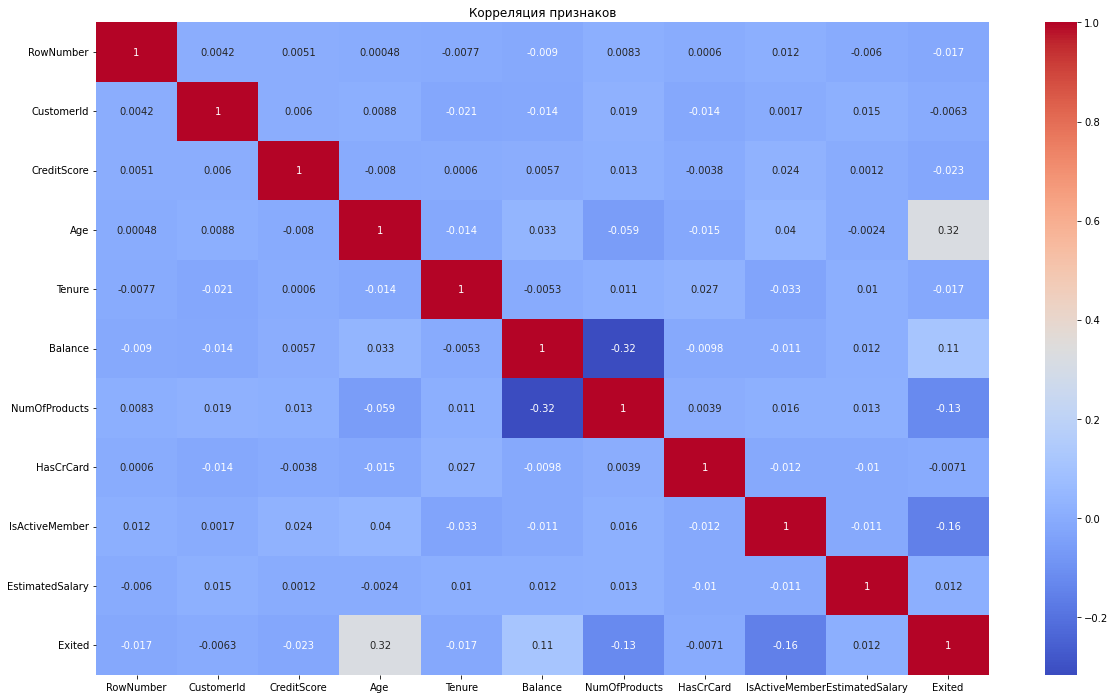

In [7]:
# Установим взаимосвязь данных 
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(df.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

In [60]:
#проверим датафрейм на пропуски
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [61]:
#проверим датафрейм на дубликаты
df.duplicated().sum()

0

Не приятная ситуация с "Tenure — сколько лет человек является клиентом банка" - есть 909 пропущенных значения. 

Изучим их:

In [62]:
#какие есть значения в столбце и сколько их
df['Tenure'].value_counts()

1.000     952
2.000     950
8.000     933
3.000     928
5.000     927
7.000     925
4.000     885
9.000     882
6.000     881
10.000    446
0.000     382
Name: Tenure, dtype: int64

In [63]:
#посмотрим на этих людей
df.loc[df['Tenure'] == 0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.000,59697.170,2,1,1,53483.210,0
35,36,15794171,Lombardo,475,France,Female,45,0.000,134264.040,1,1,0,27822.990,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.000,75888.200,1,0,0,45613.750,0
72,73,15812518,Palermo,657,Spain,Female,37,0.000,163607.180,1,0,1,44203.550,0
127,128,15782688,Piccio,625,Germany,Male,56,0.000,148507.240,1,1,0,46824.080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.000,101979.160,1,1,0,90928.480,0
9799,9800,15722731,Manna,653,France,Male,46,0.000,119556.100,1,1,0,78250.130,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.000,92398.080,1,1,1,18897.290,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.000,93143.390,1,1,0,167554.860,0


Либо чем-то заполнить, либо удалить. **Заполнить** - данное значение не как не коррелирует с остальными значениями в данных. Т.е. вывести закономерности не возможно. Просто присвоить медианное, среднее, min или  max, тоже не правильно так как таких значений около 10% и мы можем изменить статистику данных. **Удалить** - мне кажется это тоже не самое верное решение. Как раз таки потому, что таких значений хоть и меньше 10%, но все таки они логичгые по заполнению! Мы потерям коло 10% базы. 

Как мне кажется (выдвигаю свои предположения), система банка при формировании значения сколько лет, существует данный клиент, не заполняет значения "0". Т.е. 382 клиента пользуются услугами банка меньше года.

<br> Возможно, что групповая (например по географии) медиана также не принесла бы большой ошибки. А может взять и удалить, чтобы не "искушаться"... Всем же понятно, что однозначного решения здесь нет, как и алгоритма. Правило только одно (как в медицине) - НЕ нарведи. Т.е. принимаемое решение должно соотноситься с возможным ущербом на конечный результат. В нашем случае ущерб от медианного заполнения ниже от ущерба удалить данные?. Причём выше/ниже - это только на чуйке/жизенном опыте смого аналитика.<br>
Интересная это работа - быть DS-аналитиком)<br><br>
    
В данном случае, спарведливости ради, если построить распределение ДО и ПОСЛЕ заполнения пропусков, то увидим, что оно изменится. Т.е. данный подход несколько исказит инфо.<br> Тут лучшим способом будет - заполнение случайным числом.<br>
    
Ещё вараинт:<br> удалить пропущенные строки. А по окнчании построения модели, вывести важность факторов самой модели. И если фактор tenure окажется не значим, то как в принципе удалить его из моделирования, а первоначально удалённые строки - вернуть.    

In [64]:
# заменим пропуски на "0"
df['Tenure'] = df['Tenure'].fillna(0)

In [65]:
#перепроверка
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
#перепроверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**1.2 Проведем анализ данных**

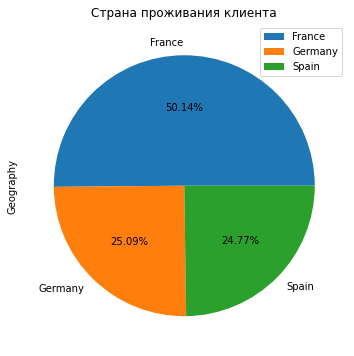

In [67]:
df['Geography'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Страна проживания клиента')
plt.show()

Складывается впечатление, что Банк находится где-то во Франции. Ну или страны Бенилюкса.

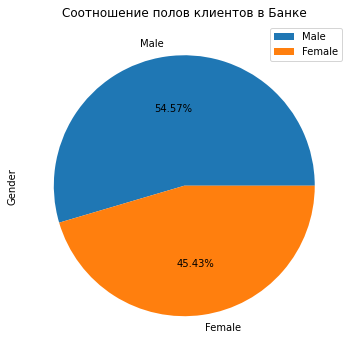

In [68]:
df['Gender'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Соотношение полов клиентов в Банке')
plt.show()

Мужчин не значительно больше, чем женщин.

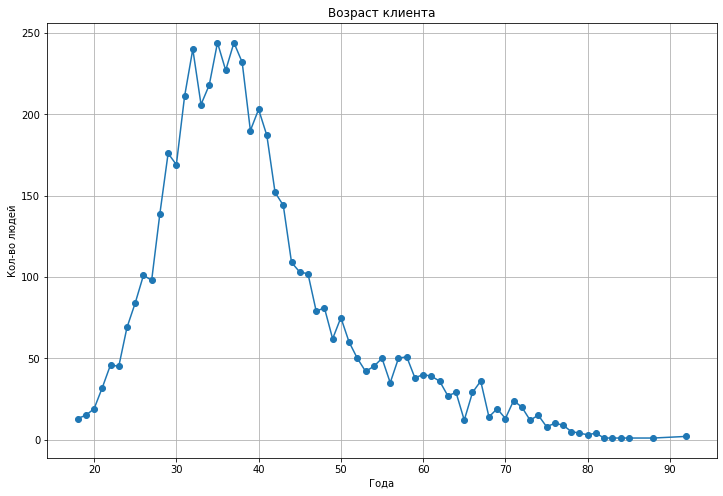

In [69]:
(
    df.pivot_table(index= 'Age', values='IsActiveMember', aggfunc='sum')
    .plot(legend=False, grid=True, style='-o', figsize=(12, 8))
)
plt.title('Возраст клиента')
plt.xlabel('Года')
plt.ylabel('Кол-во людей')
plt.show()

In [70]:
df['Age'].min()

18

In [71]:
df['Age'].max()

92

In [72]:
df['Age'].value_counts().head(10)

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64

Самому молодому клиенту 18 лет; самому пожилому - 92 года. Больше всего клиентов с 30 до 40 лет. График построен только для активных клиентов банка.

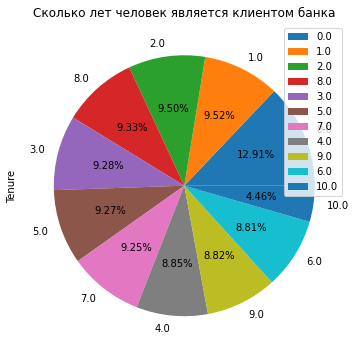

In [73]:
df['Tenure'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Сколько лет человек является клиентом банка')
plt.show()

Равномерно распределенные значения по годам.

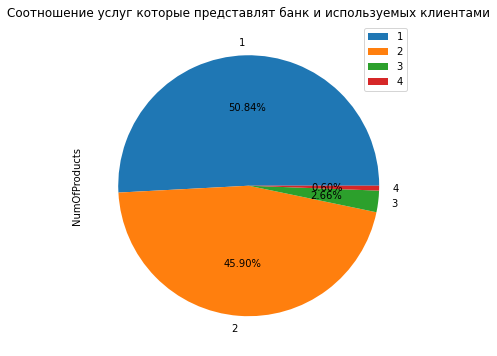

In [74]:
df['NumOfProducts'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Соотношение услуг которые представлят банк и используемых клиентами')
plt.show()

Судя по всему (по крайней мере из данных) банк представляет только 4 услуги, при чем 2 из них вообще не востребованны (3 и 4)

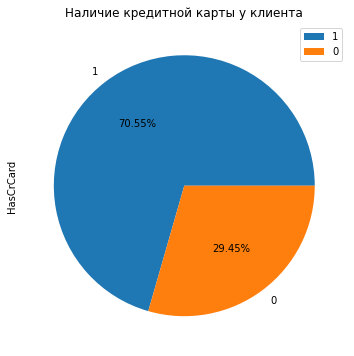

In [75]:
df['HasCrCard'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Наличие кредитной карты у клиента')
plt.show()

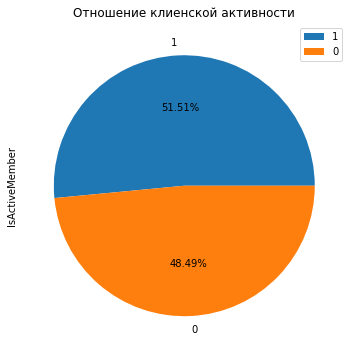

In [76]:
df['IsActiveMember'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Отношение клиенской активности')
plt.show()

Половина клиентов банка активна.

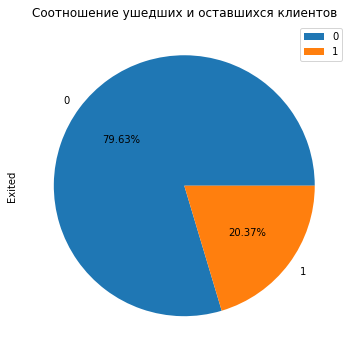

In [77]:
df['Exited'].value_counts().plot.pie(legend=True, autopct='%1.2f%%', figsize=(12,6))
plt.title('Соотношение ушедших и оставшихся клиентов')
plt.show()

**Выводы по разделу:** после проведенного мною первичного анализа данных мне кажется они очень "учебные". По всей видимости когда их готовили, то шлифовали под математику: чуток потерь, классическое разбиение по данным. Ближе к теме банка: не очень понятно как интерпритировать данные "Клиенскую активность" (как она высчитываются?); соотношение ушедших и оставшихся клиентов это за какой период данные (ушли за месяц, за неделю????). Вообщем нужно больше инфы!

## Исследование задачи

In [78]:
#удалим не нужные столбцы
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0


Есть небольшая проблема: наши данные содержат категориальные признаки. Все признаки должны стать количественными, поэтому нам подходит техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).

In [79]:
#применим прямое кодирование и проверим
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.000,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1.000,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8.000,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1.000,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2.000,125510.820,1,1,1,79084.100,0,0,1,0


In [80]:
#целевой признак
target = data_ohe['Exited']
#признаки
features = data_ohe.drop(['Exited'], axis=1)

In [81]:
#разобьем исходные данные на три выборки: обучающую, валидационную (проверочную) и тестовую (60% / 20% / 20%)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=12345, stratify=target_valid)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


Проведем "стандартизацию данных". Но не всех данных.

In [82]:
#стандартизируем признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [83]:
features_test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.504,1.430,-1.140,0.874,0.821,1,1,1.725,1,0,0
2083,-1.195,-1.430,-1.140,-1.220,-0.915,1,1,1.204,0,0,1
3234,-1.267,0.763,-1.140,-1.220,-0.915,1,0,-1.375,0,0,1
1551,0.825,1.239,0.789,-1.220,0.821,0,1,0.382,0,1,0
2344,0.660,0.953,-0.176,0.267,-0.915,1,0,-1.614,1,0,0


**Выводы по разделу:** Взял данные и подготовил их к машинному обучению. Для более наглядного анализа модель на фактических данных построю в 3 разделе.

## Борьба с дисбалансом

In [84]:
#проверим дисбаланс классов признака
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Соотношение 1:4 - классы несбалансированные. Будем менять параметры следующим образом:
1. Изменим гиперпараметр class_weight='balanced' (Увеличиваем вес объектов редкого класса "1");
2. Upsampling;
3. Downsampling.

Модель будем оценивать через F1-меру. 

*3.1 Изменим гиперпараметр class_weight='balanced' (Увеличиваем вес объектов редкого класса 1)*

*3.1.1 Модель "Решающее дерево" (balanced)*

In [85]:
best_model311 = None
best_rezult311 = 0
for depth in range(1, 10):
    # определяем вид модели и ее гиперпараметры
    model_311 = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    
    # обучаем модель на обучающем наборе данных
    model_311.fit(features_train, target_train)
    
    # получаем предсказание модели
    predictions_311 = model_311.predict(features_valid)
    
    # находим F1-меру
    rezult311 = f1_score(target_valid, predictions_311)
    
    if best_rezult311 < rezult311:
        best_rezult311 = rezult311
        max_depth311 = depth
        best_model311 = model_311

print("Лучшая F-мера", best_rezult311, 'cо значением глубины =', max_depth311)  

Лучшая F-мера 0.575925925925926 cо значением глубины = 6


*3.1.2 Модель "Случайный лес" (balanced)*

In [86]:
best_model312 = None
best_rezult312 = 0
best_depth312 = 0
best_est312 = 0
for estimator in range(10, 300, 20):
    for depth in range(1, 10):
        # определяем вид модели и ее гиперпараметры
        model_312 = RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                           max_depth = depth, class_weight='balanced')
    
        # обучаем модель на обучающем наборе данных
        model_312.fit(features_train, target_train)
    
        # получаем предсказание модели
        predictions_312 = model_312.predict(features_valid)
        
        # находим F1-меру
        rezult312 = f1_score(target_valid, predictions_312)
        
        if best_rezult312 < rezult312:
            best_model312 = model_312
            best_rezult312 = rezult312
            best_depth312 = depth
            best_est312 = estimator
            
print("Лучшая F-мера", best_rezult312, 'cо значением глубины =', best_depth312, 'количество деревьев =', best_est312)

Лучшая F-мера 0.6556655665566556 cо значением глубины = 8 количество деревьев = 150


*3.1.3 Модель "Логистическая регрессия" (balanced)*

In [87]:
# определяем вид модели и ее гиперпараметры
model_313 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

 # обучаем модель на обучающем наборе данных
model_313.fit(features_train, target_train)

# получаем предсказание модели
predictions_313 = model_313.predict(features_valid)

# находим F1-меру
rezult313 = f1_score(target_valid, predictions_313)

print("Лучшая F-мера", rezult313)

Лучшая F-мера 0.5302897278314311


*3.2 Upsampling*

In [88]:
# увеличим выборку
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled
 
features_upsampled, target_upsampled = upsample(features_train, target_train, 5) #значение подобрано

print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts())

(10888, 11)
(10888,)
1    6110
0    4778
Name: Exited, dtype: int64


*3.2.1 Модель "Решающее дерево" (Upsampling)*

In [89]:
best_model321 = None
best_rezult321 = 0
for depth in range(1, 10):
    # определяем вид модели и ее гиперпараметры
    model_321 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # обучаем модель на обучающем наборе данных
    model_321.fit(features_upsampled, target_upsampled)
    
    # получаем предсказание модели
    predictions_321 = model_321.predict(features_valid)
    
    # находим F1-меру
    rezult321 = f1_score(target_valid, predictions_321)
    
    if best_rezult321 < rezult321:
        best_rezult321 = rezult321
        max_depth321 = depth
        best_model = model_321

print("Лучшая F-мера", best_rezult321, 'cо значением глубины =', max_depth321)  

Лучшая F-мера 0.575809199318569 cо значением глубины = 6


*3.2.2 Модель "Случайный лес" (Upsampling)*

In [90]:
best_model322 = None
best_rezult322 = 0
best_depth = 0
best_est = 0
for estimator in range(10, 300, 20):
    for depth in range(1, 10):
        # определяем вид модели и ее гиперпараметры
        model_322 = RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                           max_depth = depth)
    
        # обучаем модель на обучающем наборе данных
        model_322.fit(features_upsampled, target_upsampled)
    
        # получаем предсказание модели
        predictions_322 = model_322.predict(features_valid)
        
        # находим F1-меру
        rezult322 = f1_score(target_valid, predictions_322)
        
        if best_rezult322 < rezult322:
            best_model322 = model_322
            best_rezult322 = rezult322
            best_depth322 = depth
            best_est322 = estimator
            
print("Лучшая F-мера", best_rezult322, 'cо значением глубины =', best_depth322, 'количество деревьев =', best_est322)

Лучшая F-мера 0.6396039603960396 cо значением глубины = 9 количество деревьев = 90


*3.2.3 Модель "Логистическая регрессия" (Upsampling)*

In [91]:
# определяем вид модели и ее гиперпараметры
model_323 = LogisticRegression(random_state=12345, solver='liblinear')

 # обучаем модель на обучающем наборе данных
model_323.fit(features_upsampled, target_upsampled)

# получаем предсказание модели
predictions_323 = model_323.predict(features_valid)

# находим F1-меру
rezult323 = f1_score(target_valid, predictions_323)

print("Лучшая F-мера", rezult323)

Лучшая F-мера 0.5052950075642965


*3.3 Downsampling*

In [92]:
# уменьшаем выборку
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)
print(target_downsampled.value_counts())

(1700, 11)
(1700,)
1    1222
0     478
Name: Exited, dtype: int64


*3.3.1 Модель "Решающее дерево" (Downsampling)*

In [93]:
best_model331 = None
best_rezult331 = 0
for depth in range(1, 10):
    # определяем вид модели и ее гиперпараметры
    model_331 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # обучаем модель на обучающем наборе данных
    model_331.fit(features_downsampled, target_downsampled)
    
    # получаем предсказание модели
    predictions_331 = model_331.predict(features_valid)
    
    # находим F1-меру
    rezult331 = f1_score(target_valid, predictions_331)
    
    if best_rezult331 < rezult331:
        best_rezult331 = rezult331
        max_depth331 = depth
        best_model331 = model_331

print("Лучшая F-мера", best_rezult331, 'cо значением глубины =', max_depth331) 

Лучшая F-мера 0.49801113762927607 cо значением глубины = 2


*3.3.2 Модель "Случайный лес" (Downsampling)*

In [94]:
best_model332 = None
best_rezult332 = 0
best_depth = 0
best_est = 0
for estimator in range(10, 300, 20):
    for depth in range(1, 10):
        # определяем вид модели и ее гиперпараметры
        model_332 = RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                           max_depth = depth)
    
        # обучаем модель на обучающем наборе данных
        model_332.fit(features_downsampled, target_downsampled)
    
        # получаем предсказание модели
        predictions_332 = model_332.predict(features_valid)
        
        # находим F1-меру
        rezult332 = f1_score(target_valid, predictions_332)
        
        if best_rezult332 < rezult332:
            best_model332 = model_332
            best_rezult332 = rezult332
            best_depth332 = depth
            best_est332 = estimator
            
print("Лучшая F-мера", best_rezult332, 'cо значением глубины =', best_depth332, 'количество деревьев =', best_est332)

Лучшая F-мера 0.4621072088724584 cо значением глубины = 9 количество деревьев = 30


*3.3.3 Модель "Логистическая регрессия" (Downsampling)*

In [95]:
# определяем вид модели и ее гиперпараметры
model_333 = LogisticRegression(random_state=12345, solver='liblinear')

 # обучаем модель на обучающем наборе данных
model_333.fit(features_downsampled, target_downsampled)

# получаем предсказание модели
predictions_333 = model_333.predict(features_valid)

# находим F1-меру
rezult333 = f1_score(target_valid, predictions_333)

print("Лучшая F-мера", rezult333)

Лучшая F-мера 0.42151481888035125


Было бы не правильно не проверить модель "по факту" без балансировки классов и посмотреть F1, чтобы уже более окончательно сделать выводы.

*3.4.1 Модель "Решающее дерево"*

In [96]:
best_model341 = None
best_rezult341 = 0
for depth in range(1, 10):
    # определяем вид модели и ее гиперпараметры
    model_341 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # обучаем модель на обучающем наборе данных
    model_341.fit(features_train, target_train)
    
    # получаем предсказание модели
    predictions_341 = model_341.predict(features_valid)
    
    # находим F1-меру
    rezult341 = f1_score(target_valid, predictions_341)
    
    if best_rezult341 < rezult341:
        best_rezult341 = rezult341
        max_depth341 = depth
        best_model341 = model_341

print("Лучшая F-мера", best_rezult341, 'cо значением глубины =', max_depth341)

Лучшая F-мера 0.5924855491329479 cо значением глубины = 7


*3.4.2 Модель "Случайный лес"*

In [97]:
best_model342 = None
best_rezult342 = 0
best_depth = 0
best_est = 0
for estimator in range(10, 300, 20):
    for depth in range(1, 10):
        # определяем вид модели и ее гиперпараметры
        model_342 = RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                           max_depth = depth)
    
        # обучаем модель на обучающем наборе данных
        model_342.fit(features_train, target_train)
    
        # получаем предсказание модели
        predictions_342 = model_342.predict(features_valid)
        
        # находим F1-меру
        rezult342 = f1_score(target_valid, predictions_342)
        
        if best_rezult342 < rezult342:
            best_model342 = model_342
            best_rezult342 = rezult342
            best_depth342 = depth
            best_est342 = estimator
            
print("Лучшая F-мера", best_rezult342, 'cо значением глубины =', best_depth342, 'количество деревьев =', best_est342)

Лучшая F-мера 0.596923076923077 cо значением глубины = 9 количество деревьев = 50


*3.4.3 Модель "Логистическая регрессия"*

In [98]:
# определяем вид модели и ее гиперпараметры
model_343 = LogisticRegression(random_state=12345, solver='liblinear')

 # обучаем модель на обучающем наборе данных
model_343.fit(features_train, target_train)

# получаем предсказание модели
predictions_343 = model_343.predict(features_valid)

# находим F1-меру
rezult343 = f1_score(target_valid, predictions_343)

print("Лучшая F-мера", rezult343)

Лучшая F-мера 0.3076923076923077


**Подведем итоги:**

In [99]:
print ('Balanced')
print('Модель "Решающее дерево" ',"Лучшая F-мера", best_rezult311, 'cо значением глубины =', max_depth311)
print('Модель "Случайный лес"   ' ,"Лучшая F-мера", best_rezult312, 'cо значением глубины =', best_depth312, 
      'количество деревьев =', best_est312)
print('Модель "Лог. регрессия"  ', "Лучшая F-мера", rezult313)
print ('')
print ('Upsampling')
print('Модель "Решающее дерево" ',"Лучшая F-мера", best_rezult321, 'cо значением глубины =', max_depth321)
print('Модель "Случайный лес"   ' ,"Лучшая F-мера", best_rezult322, 'cо значением глубины =', best_depth322, 
      'количество деревьев =', best_est322)
print('Модель "Лог. регрессия"  ', "Лучшая F-мера", rezult323)
print ('')
print ('Downsampling')
print('Модель "Решающее дерево" ',"Лучшая F-мера", best_rezult331, 'cо значением глубины =', max_depth331)
print('Модель "Случайный лес"   ' ,"Лучшая F-мера", best_rezult332, 'cо значением глубины =', best_depth332, 
      'количество деревьев =', best_est332)
print('Модель "Лог. регрессия"  ', "Лучшая F-мера", rezult333)
print ('')
print ('Actually')
print('Модель "Решающее дерево" ',"Лучшая F-мера", best_rezult341, 'cо значением глубины =', max_depth341)
print('Модель "Случайный лес"   ' ,"Лучшая F-мера", best_rezult342, 'cо значением глубины =', best_depth342, 
      'количество деревьев =', best_est342)
print('Модель "Лог. регрессия"  ', "Лучшая F-мера", rezult343)

Balanced
Модель "Решающее дерево"  Лучшая F-мера 0.575925925925926 cо значением глубины = 6
Модель "Случайный лес"    Лучшая F-мера 0.6556655665566556 cо значением глубины = 8 количество деревьев = 150
Модель "Лог. регрессия"   Лучшая F-мера 0.5302897278314311

Upsampling
Модель "Решающее дерево"  Лучшая F-мера 0.575809199318569 cо значением глубины = 6
Модель "Случайный лес"    Лучшая F-мера 0.6396039603960396 cо значением глубины = 9 количество деревьев = 90
Модель "Лог. регрессия"   Лучшая F-мера 0.5052950075642965

Downsampling
Модель "Решающее дерево"  Лучшая F-мера 0.49801113762927607 cо значением глубины = 2
Модель "Случайный лес"    Лучшая F-мера 0.4621072088724584 cо значением глубины = 9 количество деревьев = 30
Модель "Лог. регрессия"   Лучшая F-мера 0.42151481888035125

Actually
Модель "Решающее дерево"  Лучшая F-мера 0.5924855491329479 cо значением глубины = 7
Модель "Случайный лес"    Лучшая F-мера 0.596923076923077 cо значением глубины = 9 количество деревьев = 50
Модель

**ПОБЕДИТЕЛЬ:**

**- Параметр "Balanced"**

**- Модель "Случайный лес"    Лучшая F-мера 0.6556655665566556 cо значением глубины = 8 количество деревьев = 150**

Построим ROC-кривую лучшей модели

AUC-ROC =   0.8704074908858016


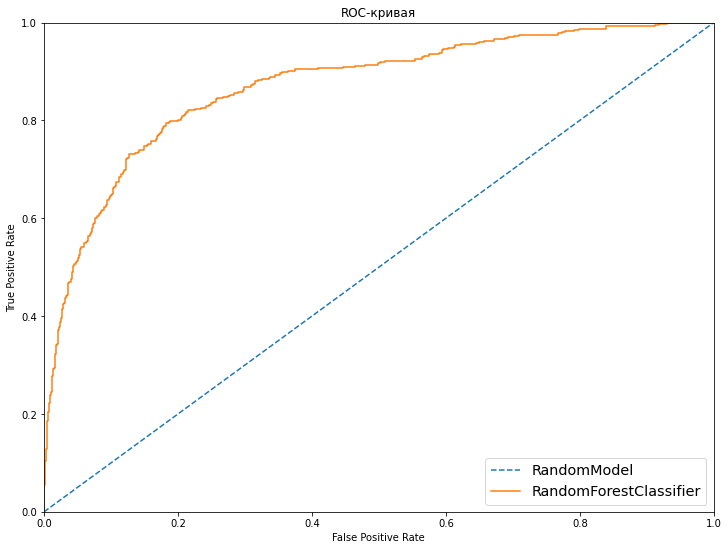

In [100]:
plt.figure(figsize=[12,9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
model_roc =  RandomForestClassifier(random_state=12345, n_estimators=150, max_depth = 8, class_weight='balanced')
model_roc.fit(features_train, target_train)
probabilities_valid = model_roc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC =  ', auc_roc)

plt.plot(fpr, tpr, label='RandomForestClassifier') # ROC-кривая случайной модели (выглядит как прямая)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

**Выводы по разделу:** Опытным путем нашли, что модель "Случайный лес" с параметром "Balanced" имеет лучшую F-меру 0.6556655665566556 cо значением глубины = 8 количество деревьев = 150. Так же построим ROC-кривую лучшей модели. AUC-ROC =   0.8704074908858016 

## Тестирование модели

In [101]:
# объеденим валидационную и тренировочную модель
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

In [102]:
model1 =  RandomForestClassifier(random_state=12345, n_estimators=150, max_depth = 8, class_weight='balanced')
model1.fit(features_full_train, target_full_train)
# получаем предсказание модели
predictions1 = model1.predict(features_test) 

# находим F1-меру
rezult1 = f1_score(target_test, predictions1)
print("Лучшая F-мера", rezult1)

probabilities_valid1 = model1.predict_proba(features_valid)
probabilities_one_valid1 = probabilities_valid1[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid1)
auc_roc1 = roc_auc_score(target_valid, probabilities_one_valid1)
print('AUC-ROC =  ', auc_roc1)

Лучшая F-мера 0.6133625410733845
AUC-ROC =   0.9249433441718395


**Судя по результатам, у меня получилась очень хорошая модель**